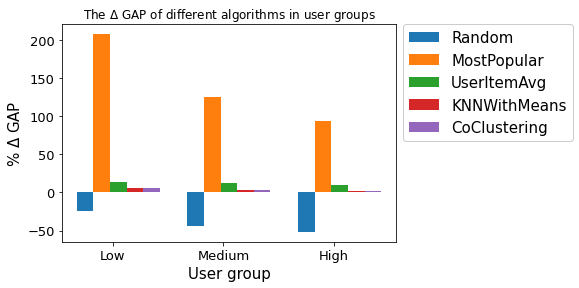

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import seaborn as sns

low_gap_vals = [
        -23.84958655845782,
        207.31405012614746,
        13.961533444910012,
        5.9728090125944915,
        5.9728090125944915,
        5.9728090125944915,
        5.9728090125944915
    ]

medium_gap_vals = [
        -44.263028979877866,
        124.40754462152253,
        11.813658392883445,
        3.222249256776752,
        3.2219959833963356,
        3.223473411448732,
        3.2245210422495263
    ]

high_gap_vals = [
        -51.846422608768975,
        93.51331523754354,
        9.6470784791586,
        2.0171913897289673,
        2.015046967640449,
        2.0181037680709815,
        2.0174644372619865
    ]


# set width of bar
barWidth = 0.15

# set height of bar
bars1 = [low_gap_vals[0], medium_gap_vals[0], high_gap_vals[0]]
bars2 = [low_gap_vals[1], medium_gap_vals[1], high_gap_vals[1]]
bars3 = [low_gap_vals[2], medium_gap_vals[2], high_gap_vals[2]]
# bars4 = [low_gap_vals[3], medium_gap_vals[3], high_gap_vals[3]]
bars5 = [low_gap_vals[4], medium_gap_vals[4], high_gap_vals[4]]
bars7 = [low_gap_vals[6], medium_gap_vals[6], high_gap_vals[6]]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r3]
r7 = [x + barWidth for x in r5]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Random')
plt.bar(r2, bars2, width=barWidth, label='MostPopular')
plt.bar(r3, bars3, width=barWidth, label='UserItemAvg')
# plt.bar(r4, bars4, width=barWidth, label='KNNBasic')
plt.bar(r5, bars5, width=barWidth, label='KNNWithMeans')
plt.bar(r7, bars7, width=barWidth, label='CoClustering')


# Add xticks on the middle of the group bars + show legend
plt.xlabel('User group', fontsize='15')
plt.ylabel('% $\Delta$ GAP', fontsize='15')
plt.xticks([r + barWidth + 0.1 for r in range(len(bars1))], ['Low', 'Medium', 'High'], fontsize='13')
plt.yticks(fontsize='13')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., framealpha=1, fontsize='15')
plt.title("The $\Delta$ GAP of different algorithms in user groups")
plt.savefig('gap_analysis_old.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
# constants and initialization
item_threshold = 0 # 0 means no filtering
my_seed = 0
rd.seed(my_seed)
np.random.seed(my_seed)
predict_col = 'MOVIE_ID'
top_fraction = 0.2
user_events_file = 'movieratings.csv'
low_user_file = '10_niche_focused_users.txt'
medium_user_file = '10_diversed_focused_users.txt'
high_user_file = '10_blockbuster_focused_users.txt'

In [3]:
df_events = pd.read_csv(user_events_file, sep=',', header=0)
df_uid_group = df_events.groupby('USER_MD5').count() >= 10
uid = df_uid_group[df_uid_group.MOVIE_ID].index
df_events = df_events[df_events.USER_MD5.isin(uid)]

In [4]:
# get item distribution
item_dist = df_events[predict_col].value_counts()
num_items = len(item_dist)

In [5]:
# get top items (20% as the top threshold)
num_top = int(top_fraction * num_items)
top_item_dist = item_dist[:num_top]
min_top_num = min(top_item_dist)
print('Min ratings of top movie:', min_top_num)
top_item_dist = item_dist[item_dist >= min_top_num]
len_top_num = len(top_item_dist)
print('No. top items: ' + str(len_top_num))

Min ratings of top movie: 120
No. top items: 5117


In [6]:
low_users = pd.read_csv(low_user_file, sep=',', index_col=0)
medium_users = pd.read_csv(medium_user_file, sep=',', index_col=0)
high_users = pd.read_csv(high_user_file, sep=',', index_col=0)

no_users = len(low_users) + len(medium_users) + len(high_users)
print('No. of users: ' + str(no_users))
print('No. of ratings per user: ' + str(len(df_events) / no_users))

No. of users: 44145
No. of ratings per user: 38.62149733831691


In [9]:
df_user_dict = pd.read_csv("../new/user_dist.csv", index_col=0)
df_user_dict

,Number_of_Movies,Random,MostPopular,UserItemAvg,KNNBasic,KNNWithMeans,NMF,CoClustering
3917c1b1b030c6d249e1a798b3154c43,2531,0.1,1,1.0,0.3,0.3,0.3,0.3
535e6f7ef1626bedd166e4dfa49bc0b4,2523,0.1,1,0.6,0.2,0.2,0.2,0.2
425889580eb67241e5ebcd9f9ae8a465,2300,0.3,1,1.0,0.1,0.1,0.1,0.1
dbb091c39a912a521a0849224bb8fdb9,2057,0.1,1,0.8,0.2,0.2,0.2,0.2
f283fea0cee9e8851c092e2aa838b675,1800,0.3,1,1.0,0.7,0.7,0.7,0.7
...,...,...,...,...,...,...,...,...
9ec0d47af10aac7e37f36a8d757aa4e3,10,0.0,1,0.6,0.6,0.6,0.6,0.6
4775fcf07c38cd07eec79254b7272dad,10,0.0,1,0.6,0.6,0.6,0.6,0.6
736b0bdd21e2bb164c0ede9652e5fe09,10,0.3,1,0.3,0.3,0.3,0.3,0.3
a55f54f9f7110cea966b1c5984b3fa62,10,0.1,1,0.3,0.3,0.3,0.3,0.3


In [10]:
# get pop fractions
pop_count = [] # number of top items per user
pop_fraq = [] # relative number of top items per user 每个用户评价流行电影占他评过电影的百分比
user_group = []
p = [[] for i in range(7)]
l = 0
m = 0
h = 0
algo_names = ['Random',
              'MostPopular',
              "UserItemAvg",
              'KNNBasic',
              'KNNWithMeans',
              'NMF',
              'CoClustering']

# 每个user评价过的电影是一个df
for u, df in df_events.groupby('USER_MD5'):
    no_user_items = len(df[predict_col]) # profile size 每个人评价过的电影数量
    no_user_pop_items = len(set(df[predict_col]) & set(top_item_dist.index)) # top items in profile 求交集
    if u in df_user_dict.index:
        for i in range(7):
            p[i].append(df_user_dict.loc[u, algo_names[i]])


    pop_count.append(no_user_pop_items)
    pop_fraq_value = no_user_pop_items / no_user_items
    pop_fraq.append(pop_fraq_value)

    if u in low_users.index: # get user group-specific values
        user_group.append("low")
        l +=1

    elif u in medium_users.index:
        user_group.append("med")
        m +=1
    else:
        user_group.append("high")
        h +=1

print(l, m, h)

10439 21737 10804


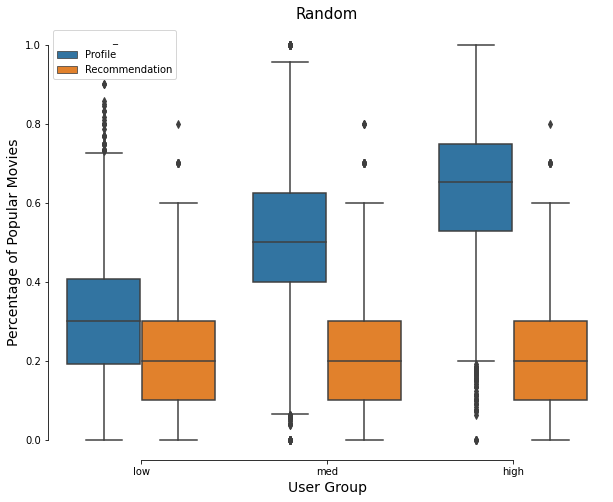

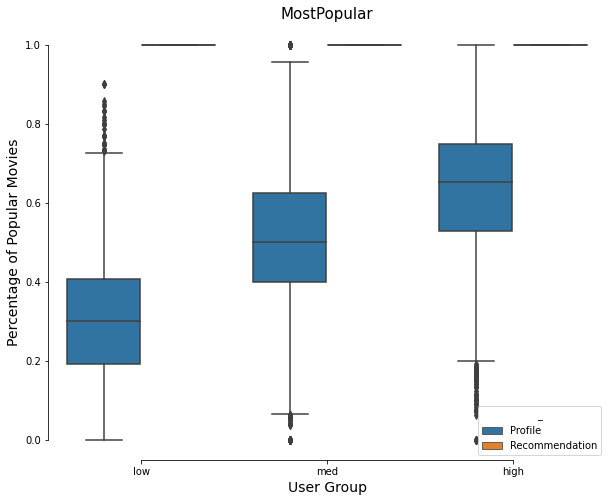

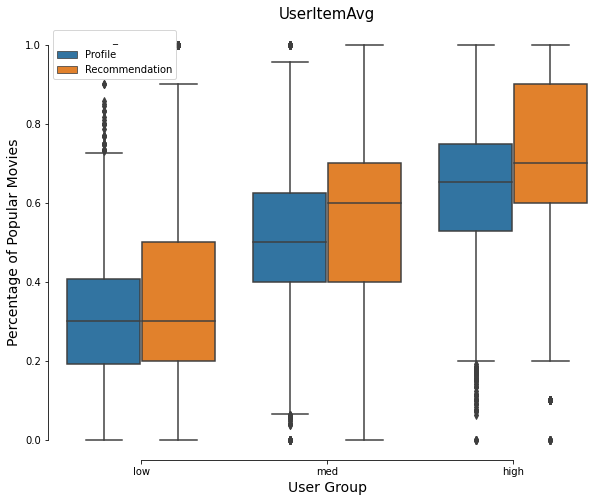

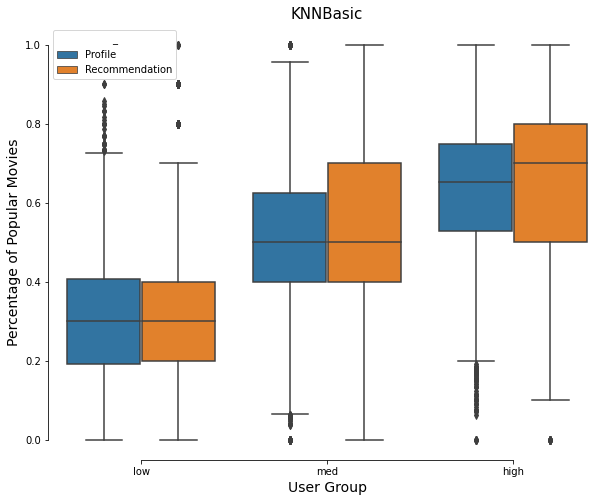

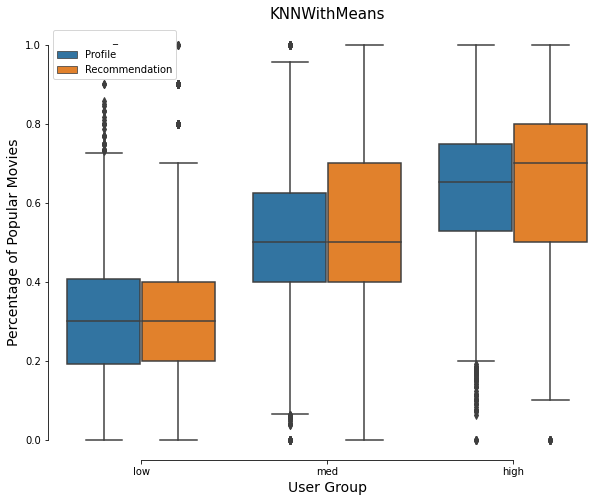

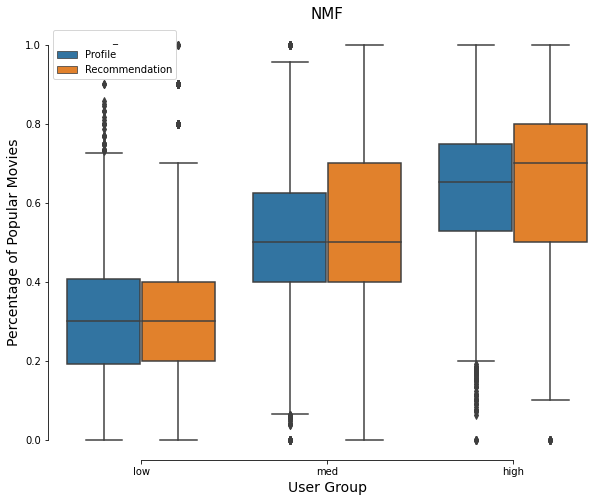

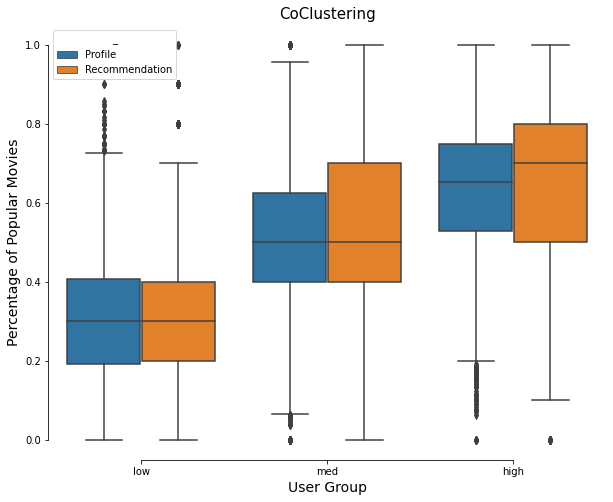

In [11]:
for i in range(7):
    df_pop_user = pd.DataFrame({"Profile" : pop_fraq, "user_group" : user_group, "Recommendation": p[i]}).sort_values("Profile")

    plt.figure(figsize=(10, 8))
    ax = (df_pop_user.set_index('user_group', append=True) # set E as part of the index
    .stack() # pull A - D into rows
    .to_frame() # convert to a dataframe
    .reset_index() # make the index into reg. columns
    .rename(columns={'level_2': '_', 0: 'Ratio of Popular Movies'}) # rename columns
    .drop('level_0', axis='columns') # drop junk columns
    .pipe((sns.boxplot, 'data'), x='user_group', y='Ratio of Popular Movies', hue='_', order=["low","med", "high" ])
    )
    plt.title(algo_names[i], fontsize="15")
    plt.xlabel('User Group', fontsize='14')
    plt.ylabel('Percentage of Popular Movies', fontsize='14')
    sns.despine(trim=True)
    plt.savefig('freq_ratio_compare' + algo_names[i] + '.png', dpi=300, bbox_inches='tight')
